# MNIST Classification test 1

This Notebook is made for testing the MNIST hand written number classification problem. And how to implement this into a federated environment

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/basic_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

1.14.1-dev20190603
2.2.4-tf


This guide uses the [MNIST of handwritten digits](http://yann.lecun.com/exdb/mnist/) dataset which contains 70,000 grayscale images in 10 categories. The images show hand written numbers at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://cdn-images-1.medium.com/max/1600/0*At0wJRULTXvyA3EK.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="http://yann.lecun.com/exdb/mnist/">MNIST handwritten samples</a> (by Yann LeCun et. al).<br/>&nbsp;
  </td></tr>
</table>

In [2]:
digits_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the number the image represents:


## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

Labels are represented as the correctly corresponding integer 0-9

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

### Preprocess the Data
The data should be preprocessed before training the network for better results. If we inspect an image in the training set, we will see that the pixel values fall in the range of 0 to 255.

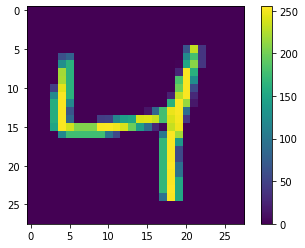

In [8]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

We need to scale the values to a range of 0 to 1 instead of 0 to 255, this is done for both the training and testing set

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Let's display the first 25 images from the training set and display their labels. So we can verify that the data is of the correct format and we're ready to build and train the network.

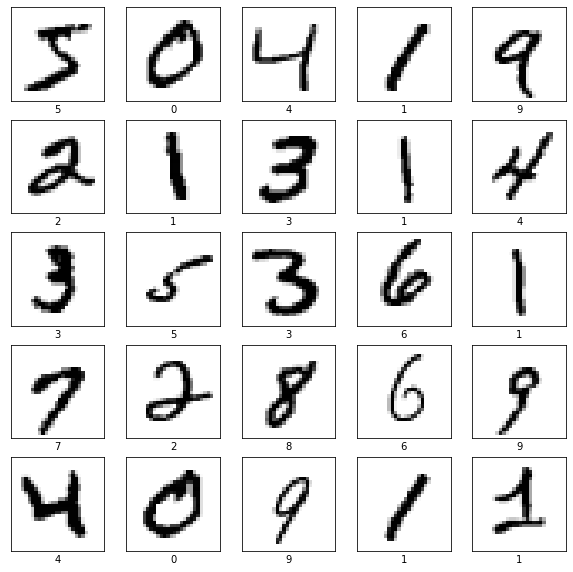

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have parameters that are learned during training.

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Conv2D(filters=1, kernel_size=3, strides=(1, 1), padding='valid', dilation_rate=(1, 1), activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy model', test_accuracy)

ValueError: Input 0 of layer conv2d_2 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 784]

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_test = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2_test = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])



The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_test.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2_test.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
images, labels = train_images[:10000], train_labels[:10000]
train_images_array = np.split(images, 2)
train_labels_array = np.split(labels, 2)

In [60]:
for _ in range(10):
    model.fit(train_images_array[0], train_labels_array[0], epochs=1, verbose=0)
    model2.fit(train_images_array[1], train_labels_array[1], epochs=1, verbose=0)
    
    weights = [model.get_weights(), model2.get_weights()]
    global_weights = [ (w1 + w2) / 2 for w1, w2 in zip(weights[0], weights[1])]
    
    
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print('Test accuracy model', test_accuracy)

    test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
    print('Test accuracy model2', test_accuracy)
    
    
    model.set_weights(global_weights)
    model2.set_weights(global_weights)
    
    model_test.fit(train_images_array[0], train_labels_array[0], epochs=1, verbose=0)
    model2_test.fit(train_images_array[1], train_labels_array[1], epochs=1, verbose=0)
    
    
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print('Test accuracy model', test_accuracy)

    test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
    print('Test accuracy model2', test_accuracy)

    test_loss, test_accuracy = model_test.evaluate(test_images, test_labels)
    print('Test accuracy model test', test_accuracy)

    test_loss, test_accuracy = model2_test.evaluate(test_images, test_labels)
    print('Test accuracy model2 test', test_accuracy)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3698 - acc: 0.8923
Test accuracy model 0.8923
10000/10000 [==============================] - 0s 47us/sample - loss: 0.3703 - acc: 0.8988
Test accuracy model2 0.8988
10000/10000 [==============================] - 0s 34us/sample - loss: 0.6638 - acc: 0.8662
Test accuracy model 0.8662
10000/10000 [==============================] - 0s 37us/sample - loss: 0.6638 - acc: 0.8662
Test accuracy model2 0.8662
10000/10000 [==============================] - 0s 50us/sample - loss: 0.3627 - acc: 0.8987
Test accuracy model test 0.8987
10000/10000 [==============================] - 1s 55us/sample - loss: 0.3885 - acc: 0.8911
Test accuracy model2 test 0.8911
10000/10000 [==============================] - 0s 37us/sample - loss: 0.3528 - acc: 0.9054
Test accuracy model 0.9054
10000/10000 [==============================] - 0s 37us/sample - loss: 0.3598 - acc: 0.8932
Test accuracy model2 0.8932
10000/10000 [=============================

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [47]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy model', test_accuracy)

test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
print('Test accuracy model2', test_accuracy)

test_loss, test_accuracy = model_test.evaluate(test_images, test_labels)
print('Test accuracy model test', test_accuracy)

test_loss, test_accuracy = model2_test.evaluate(test_images, test_labels)
print('Test accuracy model2 test', test_accuracy)


10000/10000 [==============================] - 0s 46us/sample - loss: 1.8030 - acc: 0.5729
Test accuracy model 0.5729
10000/10000 [==============================] - 0s 40us/sample - loss: 1.8030 - acc: 0.5729
Test accuracy model2 0.5729
10000/10000 [==============================] - 0s 40us/sample - loss: 1.3834 - acc: 0.6840
Test accuracy model test 0.684
10000/10000 [==============================] - 0s 40us/sample - loss: 1.4699 - acc: 0.6479
Test accuracy model2 test 0.6479


Here we can see a lower accuracy by almost 1% than during the training, this is because of overfitting. Overfitting means that the model tries too hard to make accurate predictions in the training set, making new predictions less accurate.

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [29]:
predictions = model.predict(test_images)
predictions[0]

array([4.1137632e-08, 1.0752769e-07, 7.6244846e-06, 1.1505159e-04,
       4.7441513e-12, 2.2071688e-07, 1.4936222e-12, 9.9986982e-01,
       3.6849684e-07, 6.7476562e-06], dtype=float32)

In [30]:
np.argmax(predictions[0])

7

In [31]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         true_label),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

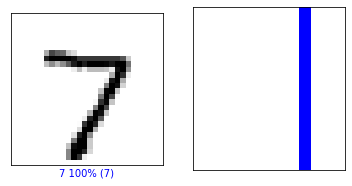

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

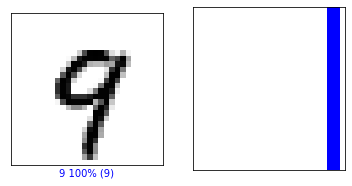

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

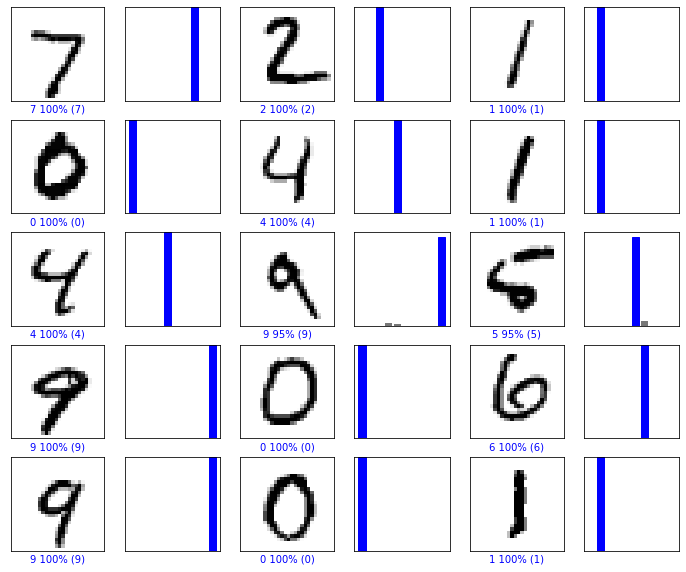

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()